In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Will your windfarm project get approved ?

In order to get consent from their local planning authority, wind farm projects have to go through a long process of planning application involving Environmental Impact Assessment studies. This is costly and time consuming, so it is important to be sure of your chances of getting the consent before pursuing it. 

### I. Collect historic project (consented and already under construction/operational)

In [4]:
#consent = pd.read_csv('./data/Project_consent.csv')

consent = pd.read_csv('data/project_consent.csv', encoding="ISO-8859-1")

In [5]:
consent.dtypes

Project                   object
Project_Capacity_MW      float64
Type                      object
Storage_Capacity_MWh     float64
Developer                 object
Owner                     object
Generator_Make            object
Generator_Model           object
Number_of_Generators     float64
Generator_Capacity       float64
Generator_Type            object
Country                   object
County                    object
UK_Region                 object
Location                  object
Sea_area                 float64
Lpa                       object
Lpa_reference             object
Latitude_Decimal         float64
Longitude_Decimal        float64
UKNatGridRef              object
Hub_Height               float64
Tip_Height               float64
Rotor_Diameter           float64
Summary_Status            object
Status                    object
ConsentedYESNO            object
Status_Date               object
ConsentLapseDate          object
ConsentExpireTerm         object
ConsentExp

In [6]:
consent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 54 columns):
Project                  4655 non-null object
Project_Capacity_MW      4654 non-null float64
Type                     4655 non-null object
Storage_Capacity_MWh     0 non-null float64
Developer                4652 non-null object
Owner                    4654 non-null object
Generator_Make           2659 non-null object
Generator_Model          2659 non-null object
Number_of_Generators     4648 non-null float64
Generator_Capacity       4651 non-null float64
Generator_Type           2523 non-null object
Country                  4655 non-null object
County                   4655 non-null object
UK_Region                4655 non-null object
Location                 4651 non-null object
Sea_area                 0 non-null float64
Lpa                      4655 non-null object
Lpa_reference            4453 non-null object
Latitude_Decimal         4598 non-null float64
Longitude_Decimal  

Keeping only the features we want and removing the missing values 

In [7]:
df = consent.filter(['Number_of_Generators','Project_Capacity_MW','ConsentedYESNO','County','Tip_Height','Latitude_Decimal','Longitude_Decimal' ],axis=1)


In [8]:
df.head(10)

,Number_of_Generators,Project_Capacity_MW,ConsentedYESNO,County,Tip_Height,Latitude_Decimal,Longitude_Decimal
0,1.0,2.000,Consented,Tyne & Wear,127.00,54.9844,-1.51667
1,1.0,0.250,Consented,Co. Down,49.50,54.5921,-5.54138
2,1.0,0.250,Consented,Co. Down,59.50,54.5941,-5.53866
3,1.0,0.500,Consented,Shropshire,67.00,52.8416,-2.92267
4,1.0,0.500,Consented,Caerphilly,77.00,51.6199,-3.28198
5,12.0,36.000,Consented,Highland,130.00,57.2536,-4.24444
6,24.0,66.000,Refused,Perth & Kinross,NaN,56.3822,-3.75861
7,1.0,0.180,Consented,Powys,48.01,52.6181,-3.82372
8,3.0,9.000,Consented,Rhondda Cynon Taff,149.90,51.6800,-3.50556
9,1.0,0.225,Consented,Pembrokeshire,45.00,51.9853,-4.96278


In [9]:
df['County'].value_counts()
#too many different categories in country so better use the latitude and longitude as they are float

Co. Tyrone                  413
Aberdeenshire               384
Co. Antrim                  294
Co. Londonderry             200
Co. Down                    171
Cornwall                    162
South Lanarkshire           142
Highland                    139
Co. Fermanagh               132
Cumbria                     130
Dumfries & Galloway         115
East Riding of Yorkshire    100
Devon                        95
Lincolnshire                 87
Lancashire                   87
Co. Armagh                   77
Scottish Borders             75
Angus                        74
Perth & Kinross              73
Fife                         71
Argyll & Bute                64
Nottinghamshire              63
Cambridgeshire               62
Carmarthenshire              61
Leicestershire               55
Pembrokeshire                53
County Durham                51
East Ayrshire                49
Northumberland               49
West Yorkshire               48
                           ... 
Cheshire

### II. Cleaning and data visualisation

In [13]:
df.tail(10)

,Number_of_Generators,Project_Capacity_MW,ConsentedYESNO,County,Tip_Height,Latitude_Decimal,Longitude_Decimal
4645,1.0,0.10,Refused,Aberdeenshire,37.0,57.4306,-1.941940
4646,1.0,0.33,Consented,East Riding of Yorkshire,61.0,53.7633,-0.523292
4647,1.0,0.50,Consented,South Yorkshire,77.0,53.4819,-1.165560
4648,1.0,0.50,Consented,Devon,77.0,50.8903,-4.315210
4649,4.0,3.20,Refused,Aberdeenshire,86.0,57.3797,-2.159440
4650,2.0,0.20,Refused,Denbighshire,35.0,53.1222,-3.384440
4651,2.0,4.60,Refused,Anglesey,93.0,53.3919,-4.394720
4652,2.0,4.60,Consented,Anglesey,92.0,53.3944,-4.394170
4653,1.0,0.10,Consented,Carmarthenshire,41.4,51.9323,-4.248780
4654,1.0,0.25,Consented,East Riding of Yorkshire,45.0,53.8114,-0.123056


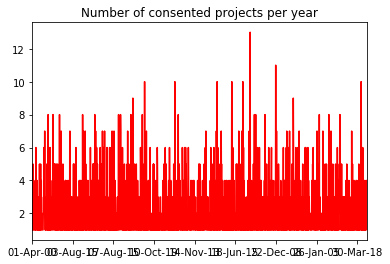

In [34]:
yearly_consented = consent["Decision_Date"].value_counts().sort_index()
yearly_consented.plot(color="red", title = "Number of consented projects per year")

In [41]:
region_consented = consent.groupby('Summary_Status')["UK_Region"].value_counts().sort_index()
region_consented

Summary_Status      UK_Region         
Ceased operating    East Midlands           1
                    East of England         2
                    Mid Wales               4
                    North East              2
                    North West              5
                    Northern Ireland        4
                    Scotland                3
                    South West              4
                    Yorkshire & Humber      3
Consented           East Midlands          14
                    East of England         7
                    Mid Wales              30
                    North East              9
                    North Wales             2
                    North West             13
                    Northern Ireland      397
                    Scotland              263
                    South East              6
                    South Wales            15
                    South West             15
                    West Midlands        

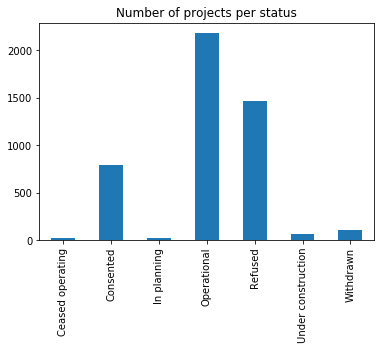

In [43]:

pipeline_status = consent['Summary_Status'].value_counts().sort_index()
pipeline_status.plot(kind="bar", title = "Number of projects per status")

#### We want to be able to predict, which projects from the number of projects "In planning" status will join the "Refused" group and which ones will not

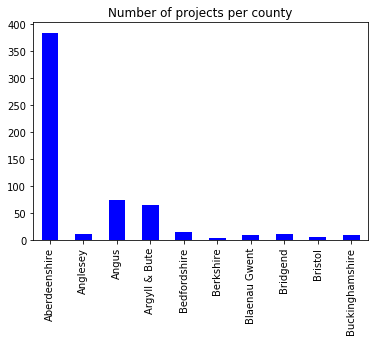

In [44]:
county_project= consent["County"].value_counts().sort_index()
county_project.head(10).plot(kind="bar", color="blue", title ="Number of projects per county")

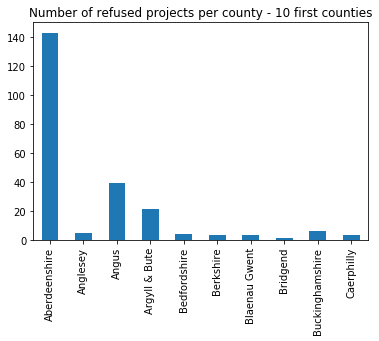

In [53]:
Refused = consent.loc[consent['Summary_Status'] == 'Refused']
Refused_regions = Refused["County"].value_counts().sort_index()
Refused_regions.head(10).plot(kind="bar", title = "Number of refused projects per county - 10 first counties")

##### we need the percentage of refused projects per county

In [57]:
df.info()
#missing data from tip heights and number of wind turbines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 7 columns):
Number_of_Generators    4648 non-null float64
Project_Capacity_MW     4654 non-null float64
ConsentedYESNO          4655 non-null object
County                  4655 non-null object
Tip_Height              4493 non-null float64
Latitude_Decimal        4598 non-null float64
Longitude_Decimal       4598 non-null float64
dtypes: float64(5), object(2)
memory usage: 254.6+ KB


In [58]:
df.describe()

,Number_of_Generators,Project_Capacity_MW,Tip_Height,Latitude_Decimal,Longitude_Decimal
count,4648.000000,4654.000000,4493.000000,4598.000000,4598.000000
mean,3.695568,6.834638,76.162948,54.547146,-3.936054
std,7.615889,21.078372,29.470718,1.961338,2.208983
min,1.000000,0.050000,3.000000,50.046100,-8.065500
25%,1.000000,0.250000,48.300000,53.326450,-6.026552
50%,1.000000,0.500000,74.000000,54.644100,-3.764025
75%,3.000000,4.680000,100.000000,55.740375,-2.405970
max,181.000000,650.000000,220.000000,60.669700,1.760560


In [59]:
df = df.dropna(axis = 0, how ='any')
df.head(10)

,Number_of_Generators,Project_Capacity_MW,ConsentedYESNO,County,Tip_Height,Latitude_Decimal,Longitude_Decimal
0,1.0,2.000,Consented,Tyne & Wear,127.00,54.9844,-1.51667
1,1.0,0.250,Consented,Co. Down,49.50,54.5921,-5.54138
2,1.0,0.250,Consented,Co. Down,59.50,54.5941,-5.53866
3,1.0,0.500,Consented,Shropshire,67.00,52.8416,-2.92267
4,1.0,0.500,Consented,Caerphilly,77.00,51.6199,-3.28198
5,12.0,36.000,Consented,Highland,130.00,57.2536,-4.24444
7,1.0,0.180,Consented,Powys,48.01,52.6181,-3.82372
8,3.0,9.000,Consented,Rhondda Cynon Taff,149.90,51.6800,-3.50556
9,1.0,0.225,Consented,Pembrokeshire,45.00,51.9853,-4.96278
10,1.0,2.350,Consented,Newport,125.00,51.5588,-2.97219


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4430 entries, 0 to 4654
Data columns (total 7 columns):
Number_of_Generators    4430 non-null float64
Project_Capacity_MW     4430 non-null float64
ConsentedYESNO          4430 non-null object
County                  4430 non-null object
Tip_Height              4430 non-null float64
Latitude_Decimal        4430 non-null float64
Longitude_Decimal       4430 non-null float64
dtypes: float64(5), object(2)
memory usage: 276.9+ KB


In [61]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression


In [62]:
X = df[["Number_of_Generators","Project_Capacity_MW","Longitude_Decimal","Latitude_Decimal","Tip_Height"]]
y = df['ConsentedYESNO']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
lr = LogisticRegression(solver='lbfgs')

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
for z in zip(lr.coef_.ravel(), X_train.columns):
    print(z)

(-0.01636183791556066, 'Number_of_Generators')
(0.0043668063190185295, 'Project_Capacity_MW')
(0.2019733485473066, 'Longitude_Decimal')
(-0.042201805624590354, 'Latitude_Decimal')
(0.005724625888884382, 'Tip_Height')


Number of Turbines has a negative effect on probability of getting consent, Tip height strangely does not. Longitude and Latitude are treated as separate paramaters which is ultimately not the goal. The position on the map should look at both latitude and longitute together an not separately. Country and Region features are too wide to obtain a relevant likehood so better use county as a dummy label 

In [66]:
# compare with the mean without the model 
import numpy as np

np.mean(X_train["Number_of_Generators"])

3.8629474363108676

In [67]:
# example of one prediction
lr.predict_proba([[3.86, 0, 0, 0, 0]])

array([[0.14567251, 0.85432749]])

so a project with 3.86 turbines has a 84% probability of getting built 

In [68]:
lr.predict_proba([[4, 12, 0, 60, 0]])

array([[0.67107336, 0.32892664]])

In [69]:
#getting rid of Longitude and Latitude, using county instead
X1 = df[["Number_of_Generators","Project_Capacity_MW","County","Tip_Height"]]
y1 = df['ConsentedYESNO']

In [70]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [71]:
#let's try random forest
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [72]:
df2 = df[["Number_of_Generators","Project_Capacity_MW","County","Tip_Height"]]

df2

,Number_of_Generators,Project_Capacity_MW,County,Tip_Height
0,1.0,2.000,Tyne & Wear,127.00
1,1.0,0.250,Co. Down,49.50
2,1.0,0.250,Co. Down,59.50
3,1.0,0.500,Shropshire,67.00
4,1.0,0.500,Caerphilly,77.00
5,12.0,36.000,Highland,130.00
7,1.0,0.180,Powys,48.01
8,3.0,9.000,Rhondda Cynon Taff,149.90
9,1.0,0.225,Pembrokeshire,45.00
10,1.0,2.350,Newport,125.00


In [73]:
X2 = pd.get_dummies(df2, columns=['County'], drop_first=True)
y2 = df['ConsentedYESNO']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.28, random_state=42)
X2

,Number_of_Generators,Project_Capacity_MW,Tip_Height,County_Anglesey,County_Angus,County_Argyll & Bute,County_Bedfordshire,County_Berkshire,County_Blaenau Gwent,County_Bridgend,...,County_Swansea,County_Tyne & Wear,County_Warwickshire,County_West Dunbartonshire,County_West Lothian,County_West Sussex,County_West Yorkshire,County_Western Isles,County_Wiltshire,County_Worcestershire
0,1.0,2.000,127.00,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,0.250,49.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.250,59.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.500,67.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.500,77.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12.0,36.000,130.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0.180,48.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.0,9.000,149.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0.225,45.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1.0,2.350,125.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
model2.fit(X2_train, y2_train)
predictions2 = model2.predict(X2_test)

print( 'Accuracy score: ')
print( accuracy_score(y2_test,predictions2))
print()
conf2 = confusion_matrix(y2_test, model2.predict(X2_test))
predicted_cols = ['pred_'+str(c) for c in y2.unique()]

print( 'Confusion matrix: ')
print( pd.DataFrame(conf2, index = y2.unique(), columns = predicted_cols))
print()
print( 'Classification report: ')
print( classification_report(y2_test,model2.predict(X2_test)))

Accuracy score: 
0.7066881547139404

Confusion matrix: 
           pred_Consented  pred_Refused
Consented             871             4
Refused               360             6

Classification report: 
              precision    recall  f1-score   support

   Consented       0.71      1.00      0.83       875
     Refused       0.60      0.02      0.03       366

    accuracy                           0.71      1241
   macro avg       0.65      0.51      0.43      1241
weighted avg       0.68      0.71      0.59      1241



In [75]:
df2.head()

,Number_of_Generators,Project_Capacity_MW,County,Tip_Height
0,1.0,2.00,Tyne & Wear,127.0
1,1.0,0.25,Co. Down,49.5
2,1.0,0.25,Co. Down,59.5
3,1.0,0.50,Shropshire,67.0
4,1.0,0.50,Caerphilly,77.0


In [76]:
categorical_feature_mask = df2.dtypes==object
categorical_feature_mask

Number_of_Generators    False
Project_Capacity_MW     False
County                   True
Tip_Height              False
dtype: bool

In [77]:
categorical_cols = df2.columns[categorical_feature_mask].tolist()

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
countylabel = df2[categorical_cols].apply(lambda col: le.fit_transform(col))

In [85]:
countylabel.head()

,County
0,98
1,20
2,20
3,88
4,10


In [86]:
df2

,Number_of_Generators,Project_Capacity_MW,County,Tip_Height
0,1.0,2.000,Tyne & Wear,127.00
1,1.0,0.250,Co. Down,49.50
2,1.0,0.250,Co. Down,59.50
3,1.0,0.500,Shropshire,67.00
4,1.0,0.500,Caerphilly,77.00
5,12.0,36.000,Highland,130.00
7,1.0,0.180,Powys,48.01
8,3.0,9.000,Rhondda Cynon Taff,149.90
9,1.0,0.225,Pembrokeshire,45.00
10,1.0,2.350,Newport,125.00


In [87]:
X3 = df2.assign(County=countylabel)
y3 = df['ConsentedYESNO']

In [88]:
X3

,Number_of_Generators,Project_Capacity_MW,County,Tip_Height
0,1.0,2.000,98,127.00
1,1.0,0.250,20,49.50
2,1.0,0.250,20,59.50
3,1.0,0.500,88,67.00
4,1.0,0.500,10,77.00
5,12.0,36.000,53,130.00
7,1.0,0.180,82,48.01
8,3.0,9.000,84,149.90
9,1.0,0.225,80,45.00
10,1.0,2.350,69,125.00


In [89]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42,  stratify=y3)

In [91]:
model3 = DecisionTreeClassifier(max_depth=3, random_state=42)
model3.fit(X3_train, y3_train)
predictions3 = model3.predict(X3_test)

print( 'Accuracy score: ')
print( accuracy_score(y2_test,predictions2))
print()
conf3 = confusion_matrix(y3_test, model3.predict(X3_test))
predicted_cols = ['pred_'+str(c) for c in y3.unique()]

print( 'Confusion matrix: ')
print( pd.DataFrame(conf3, index = y3.unique(), columns = predicted_cols))
print()
print( 'Classification report: ')
print( classification_report(y3_test,model3.predict(X3_test)))

Accuracy score: 
0.7066881547139404

Confusion matrix: 
           pred_Consented  pred_Refused
Consented             594            23
Refused               262             7

Classification report: 
              precision    recall  f1-score   support

   Consented       0.69      0.96      0.81       617
     Refused       0.23      0.03      0.05       269

    accuracy                           0.68       886
   macro avg       0.46      0.49      0.43       886
weighted avg       0.55      0.68      0.58       886



In [92]:
development = pd.read_csv('data/Projects_Development.csv', encoding="ISO-8859-1")

In [93]:
development.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 53 columns):
Project                  134 non-null object
Project_Capacity_MW      110 non-null float64
Type                     134 non-null object
Storage_Capacity_MWh     0 non-null float64
Developer                134 non-null object
Owner                    134 non-null object
Generator_Make           9 non-null object
Generator_Model          9 non-null object
Number_of_Generators     131 non-null float64
Generator_Capacity       107 non-null float64
Generator_Type           8 non-null object
Country                  134 non-null object
County                   134 non-null object
UK_Region                134 non-null object
Location                 133 non-null object
Sea_area                 0 non-null float64
Lpa                      134 non-null object
Lpa_reference            112 non-null object
Latitude_Decimal         134 non-null float64
Longitude_Decimal        134 non-null float6

In [94]:
development1 = development[["Project","Number_of_Generators","Project_Capacity_MW","County","Tip_Height"]]
development1.head()

,Project,Number_of_Generators,Project_Capacity_MW,County,Tip_Height
0,Ackron,12.0,48.0,Caithness,149.9
1,Aignish Community Wind Farm,2.0,10.0,Western Isles,145.0
2,Alwen Forest,9.0,33.0,Conwy,200.0
3,Armadale,16.0,48.0,Caithness,145.0
4,Auchenlongford,5.0,20.0,East Ayrshire,140.0


In [95]:
development2 = development1.dropna(axis = 0, how ='any')
development2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 132
Data columns (total 5 columns):
Project                 105 non-null object
Number_of_Generators    105 non-null float64
Project_Capacity_MW     105 non-null float64
County                  105 non-null object
Tip_Height              105 non-null float64
dtypes: float64(3), object(2)
memory usage: 4.9+ KB


In [96]:
new_categorical_mask = development2.dtypes==object
new_categorical_mask

Project                  True
Number_of_Generators    False
Project_Capacity_MW     False
County                   True
Tip_Height              False
dtype: bool

In [97]:
new_categorical_col = development2.columns[new_categorical_mask].tolist()

In [98]:
newcountylabel = development2[new_categorical_col].apply(lambda col: le.fit_transform(col))

In [99]:
newcountylabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 132
Data columns (total 2 columns):
Project    105 non-null int32
County     105 non-null int32
dtypes: int32(2)
memory usage: 1.6 KB


In [100]:
development3 = development2.assign(County=newcountylabel)
development4 = development3.drop('Project', axis=1)
development4.head()

,Number_of_Generators,Project_Capacity_MW,County,Tip_Height
0,12.0,48.0,0,149.9
1,2.0,10.0,1,145.0
2,9.0,33.0,2,200.0
3,16.0,48.0,3,145.0
4,5.0,20.0,4,140.0


In [107]:
r = model3.predict(development4)
r

array(['Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Refused', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Refused', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Refused',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented',
       'Consented', 'Consented', 'Consented', 'Consented', 'Consented'

a lot is consented - try again 

In [108]:
prediction = pd.DataFrame(r)

In [109]:
Project_Name = pd.DataFrame(development3['Project'])

In [110]:
forecast= prediction.assign(Project=Project_Name)
forecast

,0,Project
0,Consented,Ackron
1,Consented,Aignish Community Wind Farm
2,Consented,Alwen Forest
3,Consented,Armadale
4,Consented,Auchenlongford
5,Consented,Bachan Burn
6,Consented,Back Hareshaw Farm
7,Consented,Bad Fearn
8,Consented,Balbeg Farm
9,Consented,Ballygilbert


In [111]:
forecast.to_csv('forecast.csv')